<a href="https://colab.research.google.com/github/Betzaida-df/RNN/blob/main/clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch torchvision
!pip install opencv-python
!pip install scikit-learn
!pip install matplotlib
!pip install pillow
!pip install matplotlib
!pip install pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Import libraries

In [4]:
from fastai.vision.all import *
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support


import warnings
warnings.filterwarnings ('ignore')

Cargar datos

In [11]:
dataset_path = Path("/content/drive/MyDrive/Colab Notebooks/image")
dataset_path

Path('/content/drive/MyDrive/Colab Notebooks/image')

In [13]:
files = list(dataset_path.glob("**/*.jpg"))
print(f'Total Images = {len(files)}')

Total Images = 100


In [15]:
dataset_path.ls()

(#100) [Path('/content/drive/MyDrive/Colab Notebooks/image/100.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/10.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/1.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/4.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/32.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/22.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/25.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/16.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/18.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/24.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/17.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/37.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/12.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/40.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/29.jpg'),Path('/content/drive/MyDrive/Colab Notebooks/image/35.jpg'),Path('/content/drive/MyDrive/Cola

In [21]:
dls = ImageDataLoaders.from_folder(
    dataset_path, valid_pct=0.2,
    item_tfms=Resize(224),
    batch_tfms=[
        *aug_transforms(flip_vert=True, max_rotate=30.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2),
    ]
)

In [22]:
len(dls.train_ds)

80

In [23]:
len(dls.valid_ds)

20

In [24]:
dls

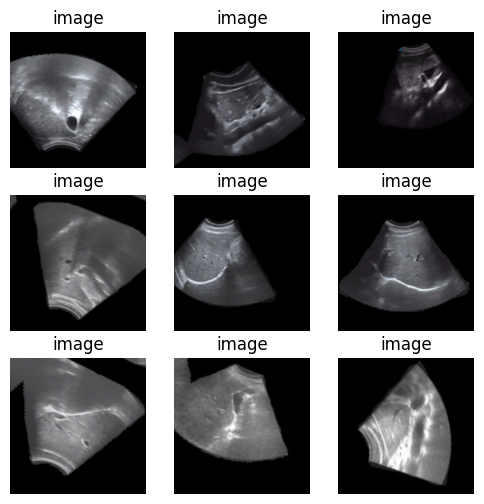

In [25]:
dls.show_batch(max_n=9, figsize=(6,6))
plt.show()

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

def multiclass_precision(preds, targs) :
  if hasattr(preds, 'detach') : preds = preds.detach() .cpu().numpy()
  if hasattr(targs, 'detach') : targs = targs.detach().cpu().numpy()
  if preds.ndim > 1 : preds = np.argmax(preds, axis=1)
  return precision_score(targs, preds, average='macro')

def multiclass_recall(preds, targs) :
  if hasattr(preds, 'detach') : preds = preds.detach() .cpu().numpy()
  if hasattr(targs, 'detach'):
        targs = targs.detach().cpu().numpy()

  if preds.ndim > 1:
        preds = preds.argmax(axis=1)
  return recall_score(targs, preds, average='macro')

def multiclass_f1(preds, targs) :
  if hasattr(preds, 'detach') : preds = preds.detach() .cpu().numpy
  if hasattr(targs, 'detach'):
        targs = targs.detach().cpu().numpy()
  if preds.ndim > 1:
        preds = preds.argmax(axis=1)
  return f1_score(targs, preds, average='macro')

Modelo

In [27]:
from fastai.losses import CrossEntropyLossFlat
from fastai.vision.all import vision_learner, resnet34

learn = vision_learner(dls, resnet34, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, multiclass_precision, multiclass_recall, multiclass_f1], model_dir=Path("/kaggle/working/models"))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 152MB/s]


In [2]:
import os

os.makedirs("/kaggle/working", exist_ok=True)


In [3]:
learn.path = Path("/kaggle/working")
learn.export("model.pkl")

NameError: name 'Path' is not defined

None


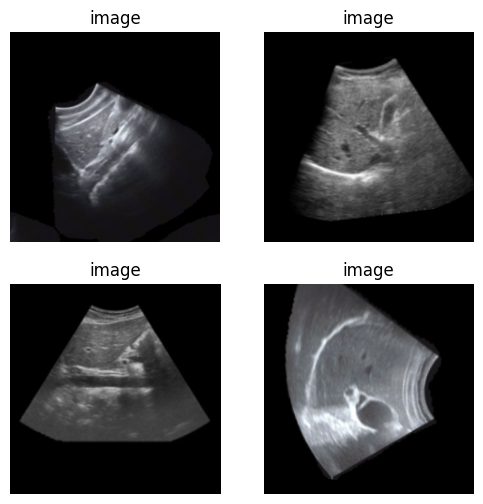

In [34]:
print(dls.train.show_batch(max_n=4, figsize=(6, 6)))



In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score

def multiclass_precision(preds, targs):
    if hasattr(preds, 'detach'):
        preds = preds.detach().cpu().numpy()
    if hasattr(targs, 'detach'):
        targs = targs.detach().cpu().numpy()
    if preds.ndim > 1:
        preds = preds.argmax(axis=1)
    return precision_score(targs, preds, average='macro')

def multiclass_recall(preds, targs):
    if hasattr(preds, 'detach'):
        preds = preds.detach().cpu().numpy()
    if hasattr(targs, 'detach'):
        targs = targs.detach().cpu().numpy()
    if preds.ndim > 1:
        preds = preds.argmax(axis=1)
    return recall_score(targs, preds, average='macro')

def multiclass_f1(preds, targs):
    if hasattr(preds, 'detach'):
        preds = preds.detach().cpu().numpy()
    if hasattr(targs, 'detach'):
        targs = targs.detach().cpu().numpy()
    if preds.ndim > 1:
        preds = preds.argmax(axis=1)
    return f1_score(targs, preds, average='macro')

modelo


In [36]:
from fastai.losses import CrossEntropyLossFlat
from fastai.vision.all import vision_learner, resnet34

learn = vision_learner(dls, resnet34, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, multiclass_precision, multiclass_recall, multiclass_f1], model_dir=Path("/kaggle/working/models"))

In [37]:
learn.path = Path("/kaggle/working")
learn.export("model.pkl")

In [38]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

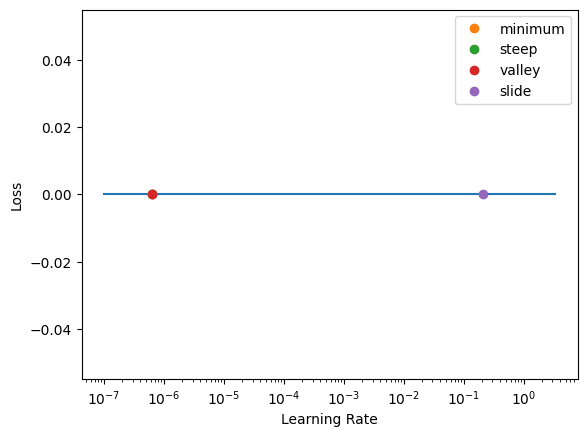

In [39]:
from fastai.callback import *

suggest_funcs = (minimum, steep, valley, slide)
lrs = learn.lr_find(suggest_funcs=suggest_funcs)
plt.show()

In [4]:
lrs

NameError: name 'lrs' is not defined